In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import re
import datetime
import dateutil
from efunds import EFund
import collections as coll
import statsmodels.api as sm

%matplotlib inline

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## eVestment Data Readin


InvUniverse_Name= ['USLargeCore', 'USLargeGrowth', 'USLargeValue']

# sample_period= '7817'

# # produce return series timestamp
# tmp_indx= []
# t= datetime.datetime( year= 1978, month= 1, day= 31)
# t= t+ dateutil.relativedelta.relativedelta( day= 31)
# tmp_indx.append( t)
# while t< datetime.datetime( year= 2017, month= 12, day=30):
#     t= t+ dateutil.relativedelta.relativedelta( months=1, day= 31)
#     tmp_indx.append( t)

# # read in data
# InvUniverse= dict()
# FundAttr_dict= dict()
# FundRet_dict= dict()
# USLaregeEquity_Index= set()
# for u in InvUniverse_Name:
#     a= pd.read_excel( io= 'eVestment/eV_'+ u+ '_'+sample_period+'.xlsx', 
#                      sheet_name= u+' General Info',
#                      index_col= None, na_values='---' ).dropna(how= 'all', axis=0)
#     a['eVestment Product ID']= a['eVestment Product ID'].astype(int).astype(str)
#     a.set_index('eVestment Product ID', inplace=True)
#     tmp_flag= [ re.match( 'Returns -', x) is not None for x in a.columns]
#     a_attr= a.loc[:, np.logical_not( tmp_flag)].transpose()
#     a_ret= a.loc[:, tmp_flag].transpose()/100
#     a_ret.index= tmp_indx
#     FundAttr_dict.update(a_attr.to_dict())
#     FundRet_dict.update( a_ret.to_dict())
#     a_indx= list(a_attr.loc[ :, a_attr.loc['VT', :]=='IX'].columns)
#     USLaregeEquity_Index= USLaregeEquity_Index.union(set( a_indx))
    
#     InvUniverse[u]= list(set(a_attr.columns)- set(a_indx))
#     InvUniverse[u+'_INDEX']= a_indx


# FundAttr= pd.DataFrame( FundAttr_dict)
# FundRet= pd.DataFrame(FundRet_dict)



# pickle.dump(FundAttr, open('FundAttr.p', 'wb'))
# pickle.dump(FundRet,  open('FundRet.p', 'wb'))
# pickle.dump(InvUniverse, open('InvUniverse.p', 'wb'))

FundAttr= pickle.load(open('FundAttr.p', 'rb'))
FundRet= pickle.load( open('FundRet.p', 'rb'))
InvUniverse= pickle.load( open( 'InvUniverse.p', 'rb'))


#### How many funds keeps reporting in each year? 



//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Number of Managers')

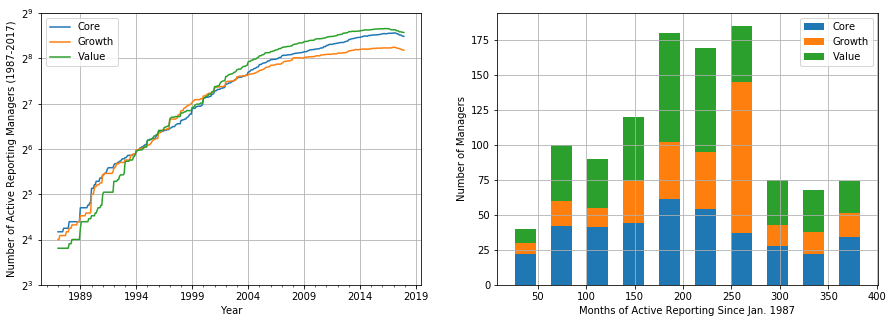

In [3]:

def stackhist(x, y, **kws):
    grouped = pd.groupby(x, y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, histtype="barstacked", label=labels, align= 'right',rwidth=.6)
    
    
plt.figure(figsize=(15,5))
ax= plt.subplot(121)
ax.set_yscale('log', basey= 2)
FundRet.loc[FundRet.index>= datetime.datetime(1987, 1,1) ,InvUniverse['USLargeCore']].count(axis =1).plot(label= 'Core', ax=ax )
FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1),InvUniverse['USLargeGrowth']].count(axis=1).plot(label= 'Growth', )
FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1),InvUniverse['USLargeValue']].count(axis=1).plot(label= 'Value', ax=ax )
plt.legend()
plt.ylabel('Number of Active Reporting Managers (1987-2017)')
plt.xlabel('Year')
plt.ylim((2**3, 2**9))
plt.grid()
ax= plt.subplot(122)

a1= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), InvUniverse['USLargeCore']].count(axis=0)
a1.name= 'Life'
a1= pd.DataFrame(a1)
a1['Strategy']='Core'
a2= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), InvUniverse['USLargeValue']].count(axis=0)
a2.name= 'Life'
a2= pd.DataFrame(a2)
a2['Strategy']='Value'
a3= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), InvUniverse['USLargeGrowth']].count(axis=0)
a3.name= 'Life'
a3= pd.DataFrame(a3)
a3['Strategy']='Growth'

tmp= pd.concat([a1, a2, a3], axis=0)
stackhist(tmp.Life, tmp.Strategy)
plt.legend()
plt.grid()
plt.xlabel('Months of Active Reporting Since Jan. 1987')
plt.ylabel('Number of Managers')


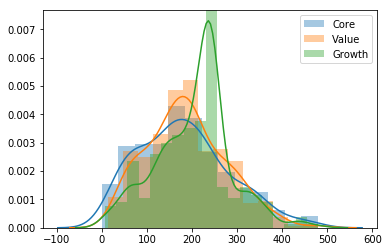

In [4]:

# FundRet[InvUniverse['USLargeCore']].count(axis=0).hist()

sns.distplot(FundRet[InvUniverse['USLargeCore']].count(axis=0), hist= True, label='Core')
sns.distplot(FundRet[InvUniverse['USLargeValue']].count(axis=0), hist= True, label= 'Value')
sns.distplot(FundRet[InvUniverse['USLargeGrowth']].count(axis=0),hist= True, label='Growth')
plt.legend()

In [5]:
INDX_raw= pickle.load(open('INDX_raw.p','rb'))
INDX_Ret= pd.concat( list({k: (x- x.shift(1))/x.shift(1) for k,x in INDX_raw.items()}.values()), axis=1) 
INDX_Ret['Value_Prem']= INDX_Ret['RU1000VTR']- INDX_Ret['RU1000TR']
INDX_Ret= INDX_Ret.loc[np.logical_and(INDX_Ret.index>= datetime.datetime(1985,1,1), 
                                      INDX_Ret.index<= datetime.datetime(2017, 10,1)), ]
FundRet= FundRet.loc[np.logical_and(  FundRet.index>= datetime.datetime(1985,1,1), 
                                      FundRet.index<= datetime.datetime(2017,10,1)), ]
INDX_EFunds= {'RU1000TR': EFund(EProdID='RU1000TR', ret= INDX_Ret['RU1000TR']),
             'RU1000VTR': EFund(EProdID='RU1000VTR', ret= INDX_Ret['RU1000VTR']),
             'RU1000GTR': EFund(EProdID='RU1000GTR', ret= INDX_Ret['RU1000GTR'])}
INDX_Ret['Bull']= INDX_Ret.RU1000TR>=0


#### Is it possible to map ConEd managers to certain group/family of funds in Evestment? 



In [6]:
eVFunds= {}
eVFundsRegs= {}
eVFundsRegs_Bull= {}
eVFundsRegs_Bear= {}

# for k, v in InvUniverse.items():
#     tmp = {}
#     regs= {}
#     for ID in v:
#         r= FundRet[ID]
#         if r.count()<10:
#             continue
#         a= EFund(EProdID=ID, ret=r, benchmark=INDX_EFunds['RU1000TR'])
#         if not(a.isMissing) and a.validRet.shape[0]>=10:
#             tmp[ID]= a
#             regs[ID]= sm.OLS(endog=a.validRet, exog= sm.add_constant(a.benchmarkRet)).fit()
    
#     EvFunds[k]= tmp
#     EvFunds_Stats[k]= regs
for ID in FundRet.columns:
    r= FundRet[ID]
    if r.count()<10:
        continue
    a= EFund( EProdID= ID, ret= r, benchmark= INDX_EFunds['RU1000TR'])
    if not (a.isMissing):
        eVFunds[ID]= a
        ret= a.validRet.copy(deep=True)
        ret.name= ID+'_ret'
        d= sm.add_constant(pd.concat([ret, a.benchmarkRet, INDX_Ret[['Value_Prem', 'Bull']]], axis=1).dropna(how='any', axis=0))
        d1= d.loc[d.Bull, ]
        d2= d.loc[np.logical_not(d.Bull), ]
        eVFundsRegs[ID]= sm.OLS(endog= d[ret.name], exog= d.drop([ret.name, 'Bull'], axis=1), missing='drop').fit()
        if d1.shape[0]>=10:
            eVFundsRegs_Bull[ID]= sm.OLS(endog= d1[ret.name],  exog= d1.drop([ret.name, 'Bull'], axis=1), missing='drop').fit()
        if d2.shape[0]>=10:
            eVFundsRegs_Bear[ID]= sm.OLS(endog= d2[ret.name],  exog= d2.drop([ret.name, 'Bull'], axis=1), missing='drop').fit()
        

In [7]:
eVFunds_Type= {}
for k,v in InvUniverse.items():
    for ID in v:
        eVFunds_Type[ID]= k
eVFunds_beta0= {k:v.params for k, v in eVFundsRegs.items()}
eVFunds_beta1= {k:v.params for k, v in eVFundsRegs_Bull.items()}
eVFunds_beta2= {k:v.params for k, v in eVFundsRegs_Bear.items()}

eVFunds_pValue0= {k:v.pvalues for k,v in eVFundsRegs.items()}
eVFunds_pValue1= {k:v.pvalues for k,v in eVFundsRegs_Bull.items()}
eVFunds_pValue2= {k:v.pvalues for k,v in eVFundsRegs_Bear.items()}

eVFunds_nobs0= {k:v.nobs for k,v in eVFundsRegs.items()}
eVFunds_nobs1= {k:v.nobs for k,v in eVFundsRegs_Bull.items()}
eVFunds_nobs2= {k:v.nobs for k,v in eVFundsRegs_Bear.items()}


c= pd.Series(eVFunds_Type, name='Type')
eVFunds_0= pd.concat([pd.DataFrame(eVFunds_beta0).T, pd.Series(eVFunds_nobs0, name= 'NObs')], axis=1)
eVFunds_0['BenchmarkCond']= 'Overall'
eVFunds_0= pd.concat([eVFunds_0, c], axis=1).dropna(how='any', axis=0)
eVFunds_0.index.name= 'EProdID'
eVFunds_0.reset_index(inplace=True)

eVFunds_1= pd.concat([pd.DataFrame(eVFunds_beta1).T, pd.Series(eVFunds_nobs1, name= 'NObs')], axis=1)
eVFunds_1['BenchmarkCond']= 'Gain'
eVFunds_1= pd.concat([eVFunds_1, c], axis=1).dropna(how='any', axis=0)
eVFunds_1.index.name= 'EProdID'
eVFunds_1.reset_index(inplace=True)

eVFunds_2= pd.concat([pd.DataFrame(eVFunds_beta2).T, pd.Series(eVFunds_nobs2, name= 'NObs')], axis=1)
eVFunds_2['BenchmarkCond']= 'Loss'
eVFunds_2= pd.concat([eVFunds_2, c], axis=1).dropna(how='any', axis=0)
eVFunds_2.index.name= 'EProdID'
eVFunds_2.reset_index(inplace=True)

eVFunds_beta= pd.concat([eVFunds_0, eVFunds_1, eVFunds_2], axis=0)
eVFunds_beta.reset_index(drop=True, inplace=True)


# eVFunds_rsq= {k:v.rsquared for k,v in eVFundsRegs.items()}
eVFunds_IR= {k:v.IR for k, v in eVFunds.items()}
eVFunds_alpha= {k:v.alpha for k,v in eVFunds.items()}
eVFunds_te= {k:v.te for k,v in eVFunds.items()}


In [8]:
eVFunds_stats= pd.DataFrame([
                            pd.Series(eVFunds_IR, name= 'IR').astype(float),
                            pd.Series(eVFunds_alpha, name= 'Alpha').astype(float),
                            pd.Series(eVFunds_te, name='TE').astype(float)]).T

c= pd.Series(eVFunds_Type, name='Type')
eVFunds_stats= pd.concat([eVFunds_stats, c], axis=1).dropna(how='any', axis=0)



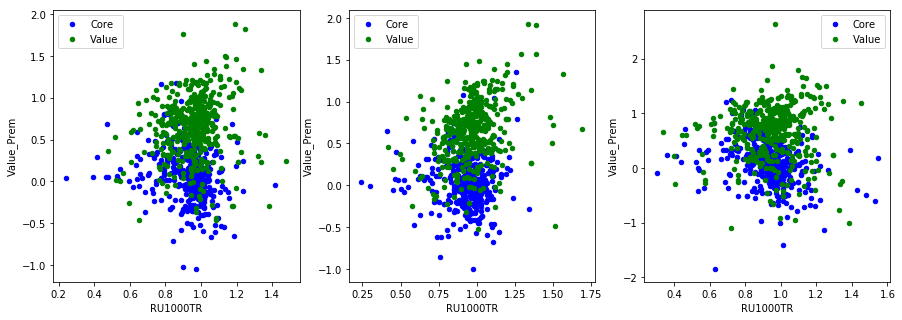

In [9]:
plt.figure(figsize=(15, 5))
ax=plt.subplot(131)
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Overall', 
                                [x in ('USLargeCore') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Core', c='blue')
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Overall', 
                                [x in ('USLargeValue') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Value', c='green')
ax= plt.subplot(132)
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Gain', 
                                [x in ('USLargeCore') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Core', c='blue')
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Gain', 
                                [x in ('USLargeValue') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Value', c='green')
ax= plt.subplot(133)
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Loss', 
                                [x in ('USLargeCore') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Core', c='blue')
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Loss', 
                                [x in ('USLargeValue') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Value', c='green')

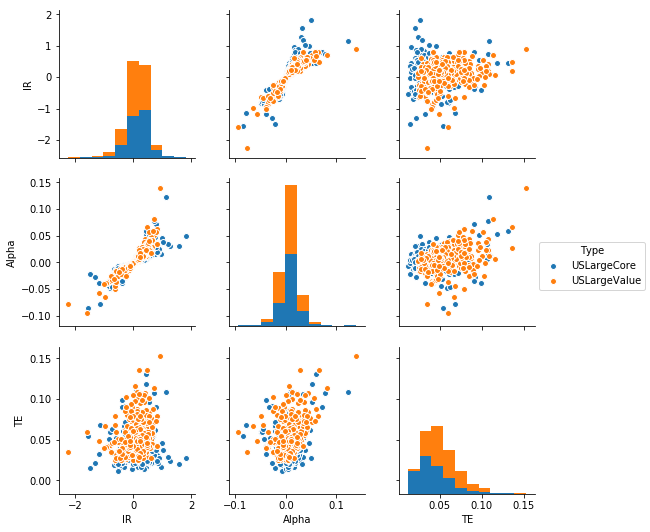

In [10]:
sns.pairplot(eVFunds_stats.loc[[x in ('USLargeCore', 'USLargeValue') for x in eVFunds_stats.Type],], hue='Type')

Three Key Features: Manager Excess Return when BM gains/loses, Full sample beta to VP

In [68]:
FundRet_Short= FundRet.loc[FundRet.index>= datetime.datetime(2013,7,1), ].dropna(how= 'any', axis=1)
FundRet_Short['RU1000TR']= INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(2013,7,1),'RU1000TR']
FundRet_Short['Value_Prem']= INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(2013,7,1), 'Value_Prem']
FundRet_Short['BM_Gain']= FundRet_Short['RU1000TR']>0

a1= FundRet_Short.loc[FundRet_Short.BM_Gain, ].mean(axis=0)
a1= a1- a1['RU1000TR']
a1.name= 'ExcessRet_Gain'
a1= pd.DataFrame(a1)
a1= pd.concat([a1, c], axis =1).dropna(how='any', axis=0)

a2= FundRet_Short.loc[np.logical_not(FundRet_Short.BM_Gain), ].mean(axis=0)
a2= a2- a2['RU1000TR']
a2.name='ExcessRet_Loss'
a2= pd.DataFrame(a2)

eVExcessRet_Short= pd.concat([a1, a2], axis=1).dropna(how='any', axis=0)
ax= plt.subplot(111)
eVExcessRet_Short.loc[eVExcessRet_Short.Type =='USLargeCore', ].plot(kind= 'scatter', x='ExcessRet_Gain', y= 'ExcessRet_Loss', label= 'Core', c= 'royalblue' , ax= ax)
eVExcessRet_Short.loc[eVExcessRet_Short.Type=='USLargeValue', ].plot(kind='scatter', x='ExcessRet_Gain', y= 'ExcessRet_Loss',  label= 'Value', c= 'orange', ax=ax)
eVExcessRet_Short.loc[eVExcessRet_Short.Type=='USLargeGrowth', ].plot(kind='scatter', x='ExcessRet_Gain', y= 'ExcessRet_Loss',  label= 'Growth', c= 'green', ax=ax)



In [62]:
eVExcessRet_Short.groupby('Type').mean()

ExcessRet_Gain  ExcessRet_Loss
Type                                               
USLargeCore               -0.000672        0.000689
USLargeCore_INDEX         -0.001610        0.001738
USLargeGrowth              0.001156        0.001264
USLargeGrowth_INDEX        0.000855        0.001090
USLargeValue              -0.001133       -0.001296
USLargeValue_INDEX        -0.002136        0.001443

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeCore', 'Alpha'], label='Core Strategy', hist= False)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeValue', 'Alpha'], label= 'Value Strategy', hist=False)
# sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeGrowth', 'Alpha'],label='Growth', hist= False)
plt.legend()
plt.grid()
plt.subplot(1,2,2)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeCore', 'IR'], label='Core Strategy', hist= False)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeValue', 'IR'], label= 'Value Strategy', hist=False)
# sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeGrowth', 'Alpha'],label='Growth', hist= False)
plt.legend()
plt.grid()



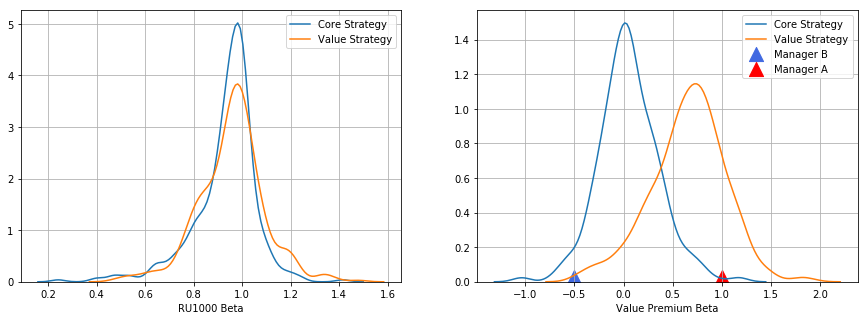

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeCore', eVFunds_beta.BenchmarkCond=='Overall'), 'RU1000TR'], label='Core Strategy', hist= False)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeValue', eVFunds_beta.BenchmarkCond=='Overall'), 'RU1000TR'], label='Value Strategy', hist= False)
plt.legend()
plt.xlabel('RU1000 Beta')
plt.grid()
plt.subplot(1,2,2)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeCore', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Core Strategy', hist= False)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeValue', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Value Strategy', hist= False)
plt.xlabel('Value Premium Beta')
plt.grid()
plt.scatter(x=-0.5, y=0.03, marker= '^', s= 200, c= 'royalblue',label= 'Manager B')
plt.scatter(x= 1, y=0.03, marker= '^', s= 200, c='red', label= 'Manager A')
plt.legend()




In [11]:
# sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeCore', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Core Strategy', hist= False)
# sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeValue', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Value Strategy', hist= False)
# plt.legend()
# plt.xlabel('Value Premium Beta')
# plt.grid()

In [12]:
ax= plt.figure(figsize= (10,5))
d= eVFunds_beta.loc[[x in ('USLargeCore', 'USLargeValue') for x in eVFunds_beta.Type], ]
sns.boxplot(x='Type', y='RU1000TR', hue='BenchmarkCond', width=0.4,
            data= d, fliersize=0)
plt.grid()
plt.ylim((0.4, 1.8))
plt.xlabel('')
plt.ylabel('RU1000 Beta')

Text(0,0.5,'RU1000 Beta')

Text(0,0.5,'Value Premium Beta')

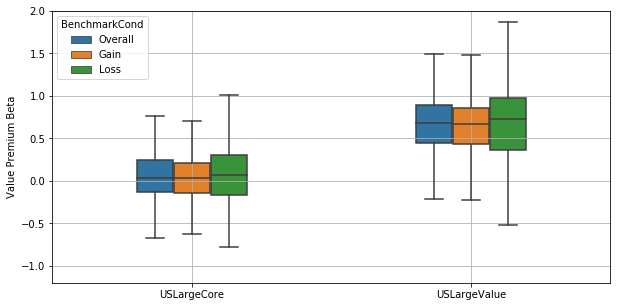

In [13]:
ax= plt.figure(figsize= (10,5))
d= eVFunds_beta.loc[[x in ('USLargeCore', 'USLargeValue') for x in eVFunds_beta.Type], ]
sns.boxplot(x='Type', y='Value_Prem', hue='BenchmarkCond', width=0.4,
            data= d, fliersize=0)
plt.grid()
plt.ylim((-1.2, 2))
plt.xlabel('')
plt.ylabel('Value Premium Beta')

In [14]:
eVFunds_beta.groupby( ['Type', 'BenchmarkCond']).median()

NObs  RU1000TR  Value_Prem     const
Type                BenchmarkCond                                       
USLargeCore         Gain           120.5  0.950834    0.035017  0.001054
                    Loss            57.0  0.947332    0.063638  0.000453
                    Overall        174.5  0.957176    0.037214  0.000900
USLargeCore_INDEX   Gain           197.5  0.975988    0.013378  0.000334
                    Loss           100.0  0.984499    0.037113  0.000070
                    Overall        297.5  0.978415    0.035059  0.000129
USLargeGrowth       Gain           144.0  0.988588   -0.798085  0.000765
                    Loss            85.0  0.974523   -0.673664  0.000297
                    Overall        228.5  0.992854   -0.762236  0.000808
USLargeGrowth_INDEX Gain           257.0  1.002267   -0.887480 -0.000767
                    Loss           136.0  1.000438   -0.846775 -0.000033
                    Overall        393.0  1.002908   -0.898411  0.000009
USLargeValue        Gain           123.0  0.965978    0.665923  0.000733
                    Loss            59.0  0.954157    0.728015  0.000838
                    Overall        180.0  0.964296    0.685230  0.000933
USLargeValue_INDEX  Gain           257.0  0.995513    0.173824 -0.000357
                    Loss           136.0  0.981829    0.503088 -0.000033
                    Overall        393.0  0.989916    0.455132 -0.000006

In [15]:
eVFunds_stats.groupby('Type').median()

IR     Alpha        TE
Type                                             
USLargeCore          0.183308  0.006518  0.038987
USLargeCore_INDEX   -0.016298 -0.000890  0.034736
USLargeGrowth        0.162442  0.010568  0.058109
USLargeGrowth_INDEX -0.044772 -0.002059  0.045989
USLargeValue         0.122319  0.006467  0.052428
USLargeValue_INDEX  -0.062341 -0.001943  0.046403

#### Event Analysis

How the group of Value and Core Managers performs when market crashes? 

The performance: absolute, and relative to RU1000

In [19]:
Downturns= pickle.load(open('Downturns.p', 'rb'))

Downturns


{0: {'End': datetime.datetime(1987, 12, 1, 0, 0),
  'Event': '1987 Black Monday',
  'Start': datetime.datetime(1987, 9, 1, 0, 0)},
 1: {'End': datetime.datetime(1990, 11, 1, 0, 0),
  'Event': '1990 MidEast Oil Crisis',
  'Start': datetime.datetime(1990, 5, 1, 0, 0)},
 2: {'End': datetime.datetime(2003, 5, 1, 0, 0),
  'Event': '2000s Market Downturns',
  'Start': datetime.datetime(2000, 2, 1, 0, 0)},
 3: {'End': datetime.datetime(2009, 4, 1, 0, 0),
  'Event': '2008 Financial Crisis',
  'Start': datetime.datetime(2007, 10, 1, 0, 0)},
 4: {'End': datetime.datetime(2016, 3, 1, 0, 0),
  'Event': '2015 China Selloff',
  'Start': datetime.datetime(2015, 7, 1, 0, 0)}}

In [70]:
DownturnEFunds= {}
for k, v in Downturns.items():
    start= v['Start']
    end= v['End']
    event= v['Event']
    
    Rets= FundRet.loc[np.logical_and(FundRet.index>= start, FundRet.index<= end),:].dropna(how= 'any', axis=1)
    evFunds= {}
    for ID in Rets.columns:
        evFunds[ID]= EFund(EProdID= ID, ret= Rets[ID], benchmark=INDX_EFunds['RU1000TR'])
    evFunds['RU1000V']= EFund(EProdID='RU1000V', 
                              ret= INDX_Ret.loc[ np.logical_and(INDX_Ret.index>= start, INDX_Ret.index<= end), 'RU1000VTR'].dropna(), 
                              benchmark=INDX_EFunds['RU1000TR'])
    
    DownturnEFunds[k]= evFunds
    

In [75]:

df_list= []
c= pd.Series(eVFunds_Type, name= 'Type')
c= pd.concat([c, pd.Series({'RU1000V': 'RU1000V'})], axis=0)
c.name= 'Type'


for k, v in DownturnEFunds.items():
    s1= pd.Series({s:u.validAnnualRet for s, u in v.items()}, name= 'Annual Return')
    s2= pd.Series({s:u.volatility for s, u in v.items()}, name= 'volatility')
    s3= pd.Series({s:u.MaxDD[1] for s, u in v.items()}, name= 'Max DD')
    s4= pd.Series({s:u.bmAnnualRet for s,u in v.items()}, name= 'Benchmark Annual Return')
    s5= pd.Series({s:u.bmVolatility for s,u in v.items()}, name= 'Benchmark Volatility')
    s6= pd.Series({s:u.RMaxDD[1] for s, u in v.items()}, name= 'Relative Max DD')
    s7= pd.Series({s:u.alpha for s, u in v.items()}, name= 'Alpha')
    s8= pd.Series({s:u.te for s,u in v.items()}, name= 'Tracking Error')
    s9= pd.Series({s:u.IR for s,u in v.items()}, name='IR')
    
    df= pd.concat([s1, s2, s3, s4, s5, s6,s7, s8,s9, c], axis=1).dropna(how='any', axis=0)
    df['Event']= k
    df_list.append(df)

eVFunds_EventPerf= pd.concat(df_list, axis=0)

In [79]:
pd.DataFrame(Downturns).T

End                    Event                Start
0  1987-12-01 00:00:00        1987 Black Monday  1987-09-01 00:00:00
1  1990-11-01 00:00:00  1990 MidEast Oil Crisis  1990-05-01 00:00:00
2  2003-05-01 00:00:00   2000s Market Downturns  2000-02-01 00:00:00
3  2009-04-01 00:00:00    2008 Financial Crisis  2007-10-01 00:00:00
4  2016-03-01 00:00:00       2015 China Selloff  2015-07-01 00:00:00

In [77]:
eVFunds_EventPerf.loc[[x in ('USLargeValue', 
                             'USLargeCore',
                            'RU1000V') for x in eVFunds_EventPerf.Type], ].groupby(['Event', 'Type']).median().T

Event                           0                                  1  \
Type                      RU1000V USLargeCore USLargeValue   RU1000V   
Annual Return           -0.715626   -0.712129    -0.736011 -0.193410   
volatility               0.328281    0.340928     0.314679  0.196748   
Max DD                  -0.256173   -0.254734    -0.262361 -0.170725   
Benchmark Annual Return -0.750458   -0.750458    -0.750458 -0.145588   
Benchmark Volatility     0.347980    0.347980     0.347980  0.214337   
Relative Max DD          0.000000    0.000000    -0.003993 -0.018893   
Alpha                    0.034832    0.038329     0.014447 -0.047823   
Tracking Error           0.020052    0.048506     0.053412  0.029408   
IR                       1.737083    0.681497     0.283305 -1.626205   

Event                                                    2              \
Type                    USLargeCore USLargeValue   RU1000V USLargeCore   
Annual Return             -0.127464    -0.193767 -0.027538   -0.057262   
volatility                 0.212557     0.193080  0.173008    0.180263   
Max DD                    -0.148998    -0.170542 -0.276837   -0.357371   
Benchmark Annual Return   -0.145588    -0.145588 -0.107180   -0.107180   
Benchmark Volatility       0.214337     0.214337  0.188642    0.188642   
Relative Max DD           -0.009044    -0.028299 -0.069426   -0.059386   
Alpha                      0.018123    -0.048180  0.079642    0.049918   
Tracking Error             0.040612     0.050949  0.102159    0.066584   
IR                         0.858844    -1.181384  0.779591    0.688218   

Event                                        3                           \
Type                    USLargeValue   RU1000V USLargeCore USLargeValue   
Annual Return               0.016895 -0.374113   -0.303063    -0.325179   
volatility                  0.174444  0.227485    0.214398     0.219943   
Max DD                     -0.260408 -0.543895   -0.470914    -0.493750   
Benchmark Annual Return    -0.107180 -0.336259   -0.336259    -0.336259   
Benchmark Volatility        0.188642  0.221472    0.221472     0.221472   
Relative Max DD            -0.067712 -0.078848   -0.033546    -0.056408   
Alpha                       0.124075 -0.037854    0.033196     0.011079   
Tracking Error              0.116180  0.050816    0.049632     0.060653   
IR                          1.072836 -0.744937    0.660498     0.194106   

Event                           4                           
Type                      RU1000V USLargeCore USLargeValue  
Annual Return           -0.121250   -0.098235    -0.126916  
volatility               0.146547    0.153202     0.150525  
Max DD                  -0.087949   -0.089980    -0.098357  
Benchmark Annual Return -0.090802   -0.090802    -0.090802  
Benchmark Volatility     0.155602    0.155602     0.155602  
Relative Max DD         -0.010929   -0.019873    -0.030177  
Alpha                   -0.030449   -0.007434    -0.036114  
Tracking Error           0.018933    0.028802     0.036134  
IR                      -1.608200   -0.249187    -1.065778

In [33]:
u= eVFunds['0']

u.RMaxDD


[Timestamp('2014-02-28 00:00:00'), -0.070229487156815387]

In [34]:
eVFunds_Type

{'604788': 'USLargeCore',
 '959209': 'USLargeCore',
 '654992': 'USLargeCore',
 '606188': 'USLargeCore',
 '600927': 'USLargeCore',
 '1167962': 'USLargeCore',
 '606939': 'USLargeCore',
 '1583833': 'USLargeCore',
 '1149178': 'USLargeCore',
 '602266': 'USLargeCore',
 '648672': 'USLargeCore',
 '1002943': 'USLargeCore',
 '620559': 'USLargeCore',
 '609292': 'USLargeCore',
 '1003632': 'USLargeCore',
 '606271': 'USLargeCore',
 '987733': 'USLargeCore',
 '611469': 'USLargeCore',
 '1543240': 'USLargeCore',
 '691879': 'USLargeCore',
 '605252': 'USLargeCore',
 '620779': 'USLargeCore',
 '601438': 'USLargeCore',
 '1433023': 'USLargeCore',
 '824025': 'USLargeCore',
 '982013': 'USLargeCore',
 '621348': 'USLargeCore',
 '691492': 'USLargeCore',
 '798512': 'USLargeCore',
 '602091': 'USLargeCore',
 '612925': 'USLargeCore',
 '1485423': 'USLargeCore',
 '666065': 'USLargeCore',
 '678455': 'USLargeCore',
 '1228842': 'USLargeCore',
 '838043': 'USLargeCore',
 '1173775': 'USLargeCore',
 '665526': 'USLargeCore',
 '